In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import ast

# Load data
rf = pd.read_csv("/Users/arsenpankiv/Desktop/Python_practice/small_dataset.csv")

# Clean data
rf["date"] = pd.to_datetime(rf["date"])
rf["skills_list"] = rf["skills_list"].apply(
    lambda skills: ast.literal_eval(skills) if isinstance(skills, str) else skills
)

In [2]:
rf_skills = rf.copy()
rf_skills = rf_skills.explode('skills_list')
skills_count = rf_skills.groupby(["skills_list", "job_title"]).size()
rf_skills_count = skills_count.reset_index(name='skill_count')
rf_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

rf_skills_count

,skills_list,job_title,skill_count
28,SAS,Statistician,5
26,Regression,Statistician,5
20,Probability,Statistician,5
16,Optimization,Operations Analyst,3
14,NoSQL,Database Administrator,3
31,Security,Database Administrator,3
5,Data Analysis,Statistician,3
25,R,Statistician,3
24,Python,Statistician,3
8,Data Recovery,Database Administrator,3


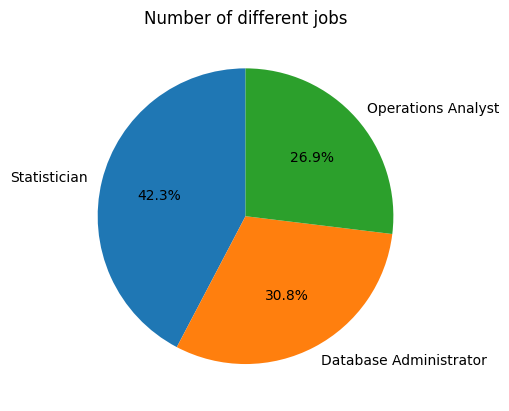

In [3]:
"""let's now move on the pit charts"""

rf["job_title"].value_counts()

# rf["job_title"].value_counts().plot(kind="pie")
"""we may also add start angle of pie chart"""
# rf["job_title"].value_counts().plot(kind="pie", startangle= 90)
"""let's now add percentages """
# rf["job_title"].value_counts().plot(kind="pie", startangle= 90, autopct="%1f")
"""we may also specifcy decimal places"""
# rf["job_title"].value_counts().plot(kind="pie", startangle= 90, autopct="%1.1f")
"""f specifies that this is a float number"""
"""let's now add percantage symbol"""
rf["job_title"].value_counts().plot(kind="pie", startangle= 90, autopct="%1.1f%%")
plt.title("Number of different jobs")
plt.ylabel("")
plt.show()

In [4]:
"""let's now plot three different pie chart on one sinle plot"""

rf_three = rf[["job_title","job__health_insurance", "work_from_home"]]

Index(['Statistician', 'Database Administrator', 'Operations Analyst'], dtype='object', name='job_title')
Index([True, False], dtype='bool', name='job__health_insurance')
Index([False, True], dtype='bool', name='work_from_home')


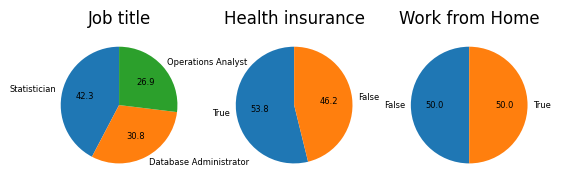

In [ ]:
fig, ax = plt.subplots(1,3)
"""one row and three columns"""
# ax.pie(rf["work_from_home"].value_counts())

dict1 = {
    "job_title": "Job title",
    "job__health_insurance": "Health insurance",
    "work_from_home": "Work from Home"

}

for i,(column,title) in enumerate(dict1.items()):
    # print(i,column,title)
    # print(rf[column].value_counts().index)
    ax[i].pie((rf[column].value_counts()), startangle= 90, autopct="%1.1f",textprops={'fontsize': 6}, labels= rf[column].value_counts().index)
    ax[i].set_title(title)